*Student Full Name: Derly Milded Montealegre Gonzalez 
*Student Number: 2024151 
*Module Title: Machine Learning (10 ETCS)
*Assessment Title: CA1 Project
*Assessment Due Date: 6 March 2024 
*Date of Submission: 21 April 2024

# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

# Reading the Data

Due to the fact that the original csv file had some chinese characters 
we use latin1 file encoding rather than the default type

In [2]:
data = pd.read_csv("new.csv", encoding="latin1")
dtypes = {'columna1': str, 'columna2': float, 'columna3': int}
data.head()

C:\Users\monte\AppData\Local\Temp\ipykernel_18384\2884351231.py:1: DtypeWarning: Columns (1,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("new.csv", encoding="latin1")


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101000000000.0,116.475489,40.019520,1.110000e+12,09/08/2016,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101000000000.0,116.453917,39.881534,1.110000e+12,28/07/2016,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101000000000.0,116.561978,39.877145,1.110000e+12,11/12/2016,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101000000000.0,116.438010,40.076114,1.110000e+12,30/09/2016,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101000000000.0,116.428392,39.886229,1.110000e+12,28/08/2016,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


Remove columns that do not interfere with my objective

In [3]:
data.drop('url', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('floor', axis=1, inplace=True)

In [4]:
data.info

<bound method DataFrame.info of                Lng        Lat           Cid   tradeTime     DOM  followers  \
0       116.475489  40.019520  1.110000e+12  09/08/2016  1464.0        106   
1       116.453917  39.881534  1.110000e+12  28/07/2016   903.0        126   
2       116.561978  39.877145  1.110000e+12  11/12/2016  1271.0         48   
3       116.438010  40.076114  1.110000e+12  30/09/2016   965.0        138   
4       116.428392  39.886229  1.110000e+12  28/08/2016   927.0        286   
...            ...        ...           ...         ...     ...        ...   
136692  116.518978  39.904327  1.110000e+12  30/06/2013     1.0          1   
136693  116.454732  39.952827  1.110000e+12  01/03/2013     1.0          1   
136694  116.463730  39.900336  1.110000e+12  07/03/2013     NaN          0   
136695  116.476380  39.875691  1.110000e+12  12/03/2013     NaN          1   
136696  116.420220  40.044807  1.110000e+12  25/02/2013     1.0          0   

        totalPrice  price  squa

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136697 entries, 0 to 136696
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  136697 non-null  float64
 1   Lat                  136697 non-null  float64
 2   Cid                  136697 non-null  float64
 3   tradeTime            136697 non-null  object 
 4   DOM                  102925 non-null  float64
 5   followers            136697 non-null  int64  
 6   totalPrice           136697 non-null  float64
 7   price                136697 non-null  int64  
 8   square               136697 non-null  float64
 9   livingRoom           136697 non-null  object 
 10  drawingRoom          136697 non-null  object 
 11  kitchen              136697 non-null  int64  
 12  bathRoom             136697 non-null  int64  
 13  buildingType         135472 non-null  float64
 14  constructionTime     136697 non-null  object 
 15  renovationConditi

In [6]:
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,bathRoom,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,136697.000000,136697.000000,1.366970e+05,102925.000000,136697.000000,136697.000000,136697.000000,136697.000000,136697.000000,136697.000000,135472.000000,136697.000000,136697.000000,1.366970e+05,136675.000000,136675.000000,136675.000000,136697.000000,136578.000000
mean,116.411936,39.976932,1.151293e+12,44.370940,27.899603,403.119864,49505.574885,86.576565,0.991799,1.541073,3.107902,2.791239,4.300855,7.361263e+01,0.549706,0.547511,0.578123,6.592573,58797.356141
std,0.105181,0.101332,3.585071e+12,56.529675,46.751869,267.502632,26272.025728,39.177790,0.126915,25.394560,1.238294,1.263210,1.936815,2.707251e+04,0.497525,0.497739,0.493861,2.321932,20506.351921
min,116.072514,39.627030,1.110000e+12,1.000000,0.000000,0.100000,2.000000,10.500000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344041,39.905003,1.110000e+12,8.000000,1.000000,235.500000,28371.000000,59.150000,1.000000,1.000000,3.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,43597.000000
50%,116.416894,39.966824,1.110000e+12,25.000000,12.000000,342.000000,44290.000000,79.010000,1.000000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,54263.000000
75%,116.472064,40.072066,1.110000e+12,61.000000,35.000000,499.000000,64963.000000,102.750000,1.000000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,7.000000,69042.000000
max,116.732378,40.252758,1.110000e+15,1464.000000,1143.000000,18130.000000,150000.000000,1745.500000,4.000000,2011.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


# Missing Data 

# Calculate the number of missing values per variable

In [7]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

# Missing values graph

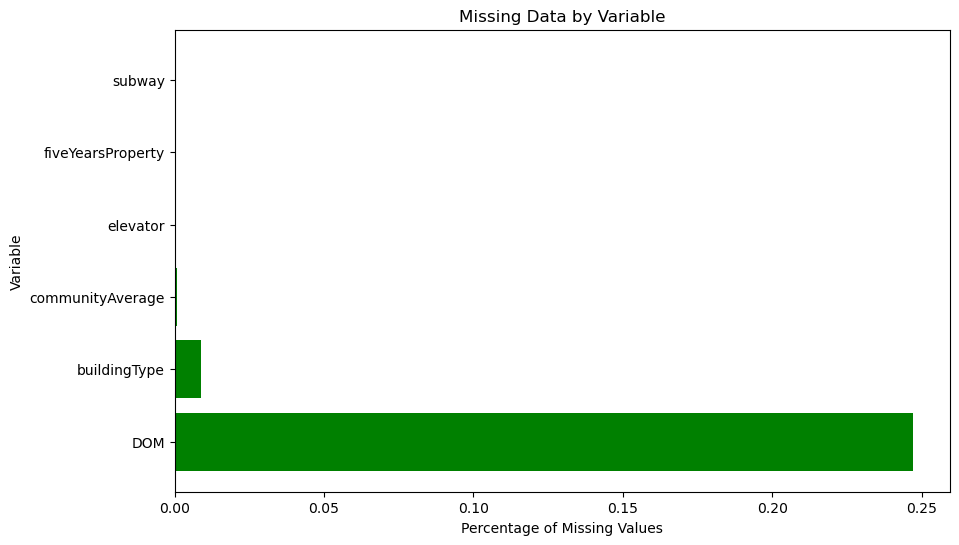

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

Understand the distribution of the data in the 'DOM' column, identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, and check if the standard deviation is high

In [9]:
data['DOM'].describe()

count    102925.000000
mean         44.370940
std          56.529675
min           1.000000
25%           8.000000
50%          25.000000
75%          61.000000
max        1464.000000
Name: DOM, dtype: float64

Using the median of the existing values in the DOM,buildingType,communityAverage column to replace missing values

In [10]:
import numpy as np
mediana_DOM = np.nanmedian(data['DOM'])
data['DOM'] = np.where(np.isnan(data['DOM']), mediana_DOM, data['DOM'])

In [11]:
mediana_buildingType = np.nanmedian(data['buildingType'])
data['buildingType'] = np.where(np.isnan(data['buildingType']), mediana_DOM, data['buildingType'])

In [12]:
mediana_communityAverage = np.nanmedian(data['communityAverage'])
data['communityAverage'] = np.where(np.isnan(data['communityAverage']), mediana_DOM, data['communityAverage'])

So that they are recognized as missing values and treated appropriately in the resulting DataFrame

In [13]:
missing_value_formats = ["?","NA","Na","NaN.",".NaN","NaN","nA","na","n.a","n.a.","Î´Öª",".n.a","n/a","nan","--","UnKnown"]
data = pd.read_csv('new.csv', encoding="latin1", na_values=missing_value_formats)

C:\Users\monte\AppData\Local\Temp\ipykernel_18384\482539287.py:2: DtypeWarning: Columns (1,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('new.csv', encoding="latin1", na_values=missing_value_formats)


Identifying which columns have missing values

In [14]:
data.isnull().sum()

url                        0
id                         0
Lng                        0
Lat                        0
Cid                        0
tradeTime                  0
DOM                    33772
followers                  0
totalPrice                 0
price                      0
square                     0
livingRoom                 0
drawingRoom                0
kitchen                    0
bathRoom                   0
floor                      0
buildingType            1225
constructionTime        5433
renovationCondition        0
buildingStructure          0
ladderRatio                0
elevator                  22
fiveYearsProperty         22
subway                    22
district                   0
communityAverage         119
dtype: int64

Columns has a missing value (NaN), I replace it with 0

In [15]:
data["elevator"].fillna(0, inplace=True)         
data["fiveYearsProperty"].fillna(0, inplace=True) 
data["subway"].fillna(0, inplace=True)

In [16]:
data.isnull().sum()

url                        0
id                         0
Lng                        0
Lat                        0
Cid                        0
tradeTime                  0
DOM                    33772
followers                  0
totalPrice                 0
price                      0
square                     0
livingRoom                 0
drawingRoom                0
kitchen                    0
bathRoom                   0
floor                      0
buildingType            1225
constructionTime        5433
renovationCondition        0
buildingStructure          0
ladderRatio                0
elevator                   0
fiveYearsProperty          0
subway                     0
district                   0
communityAverage         119
dtype: int64

# Levels Assignement

In [17]:
data_copy = data.copy()
data_copy['buildingType'] = data_copy['buildingType'].replace({1: 'Tower', 
                                                               2: 'Bungalow', 
                                                               3: 'Plate/Tower', 
                                                               4: 'Plate'})

In [18]:
data_copy['renovationCondition'] = data_copy['renovationCondition'].replace({ 1 : "Other",
                                                                    2 : "Rough",
                                                                    3 : "Simplicity",
                                                                    4 : "Hardcover"})

In [19]:
data_copy['buildingStructure'] = data_copy['buildingStructure'].replace({ 1 : "Unavailable",
                                                                    2 : "Mixed",
                                                                    3 : "Brick/Wood",
                                                                    4 : "Brick/Concrete",
                                                                    5: "Steel",
                                                                    6: "Steel/Concrete"})

In [20]:
data_copy['elevator'] = data_copy['elevator'].replace({ 1 : "Has_elevator",
                                                        2 : "No_elevator"})

In [21]:
data_copy['subway'] = data_copy['subway'].replace({ 1 : "Has_Subway",
                                                    2 : "No_Subway"})

In [22]:
data_copy['fiveYearsProperty'] = data_copy['fiveYearsProperty'].replace({ 1 : "Ownership < 5",
                                                                          2 : "Ownership > 5"})

In [23]:
data_copy['district'] = data_copy['district'].replace({ 1 : "DongCheng",
                                                        2 : "FengTai",
                                                        3 : "DaXing",
                                                        4 : "FaXing",
                                                        5 : "FangShang",
                                                        6 : "ChangPing",
                                                        7 : "ChaoYang",
                                                        8 : "HaiDian",
                                                        9 : "ShiJingShan",
                                                       10 : "XiCheng",
                                                       11 : "TongZhou",
                                                       12 : "ShunYi",
                                                       13 : "MenTouGou"})

# Conversion of variables

In [24]:
data2 = data.copy()
group_categorical = ['buildingType','renovationCondition','buildingStructure',
                     'elevator','subway','district']
data2[group_categorical] = data2[group_categorical].astype('category')
data2 = data2[pd.to_numeric(data2['constructionTime'], errors='coerce').notnull()]
data2['constructionTime'] = pd.to_numeric(data2['constructionTime'])

#Calculate the number of missing values per column

In [25]:
x3 = data2.isna().sum()
missing = pd.DataFrame({'Variable': x3.index, 'Value': x3.values})
missing = missing[missing['Value'] > 0]
missing['Value'] = missing['Value'] / len(data2)

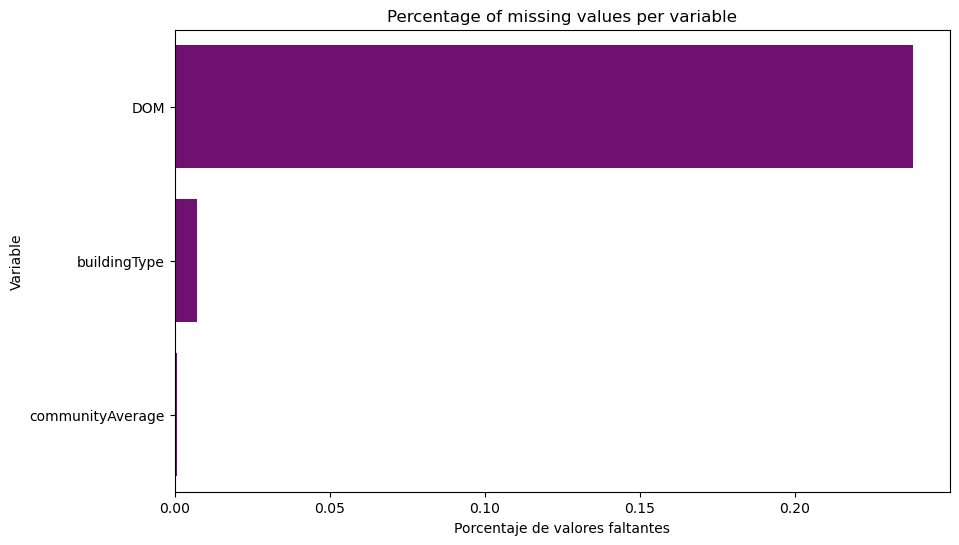

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Variable', data=missing.sort_values(by='Value', ascending=False),
            color='purple')
plt.xlabel('Porcentaje de valores faltantes')
plt.ylabel('Variable')
plt.title('Percentage of missing values per variable')
plt.show()

The conversion from build time to numeric value introduced some new NAs, due to the encoding in Latin characters

In [27]:
summary = data2['constructionTime'].describe()
print(summary)

count    131264.000000
mean       1999.912306
std          27.254685
min           0.000000
25%        1995.000000
50%        2003.000000
75%        2006.000000
max        2016.000000
Name: constructionTime, dtype: float64


In [28]:
data2_without_na = data2.dropna()
data_cleaned = data2_without_na[(data2_without_na['constructionTime'] != 0) & 
                                 (data2_without_na['constructionTime'] != 1)]

In [29]:
summary = data2['DOM'].describe()
print(summary)

count    100027.000000
mean         44.641047
std          56.488620
min           1.000000
25%           8.000000
50%          25.000000
75%          61.000000
max        1464.000000
Name: DOM, dtype: float64


In [30]:
columnas_con_nan = ['DOM','buildingType','communityAverage','bathRoom']
data3 = data2.dropna(subset=columnas_con_nan)
missing_values_count = data3.isna().sum()
print(missing_values_count)

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64


These columns that are not important for my information

In [31]:
data3.drop('url', axis=1, inplace=True)
data3.drop('id', axis=1, inplace=True)
data3.drop('floor', axis=1, inplace=True)

C:\Users\monte\AppData\Local\Temp\ipykernel_18384\4018131883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('url', axis=1, inplace=True)
C:\Users\monte\AppData\Local\Temp\ipykernel_18384\4018131883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('id', axis=1, inplace=True)
C:\Users\monte\AppData\Local\Temp\ipykernel_18384\4018131883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('floor', a

In [32]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99186 entries, 0 to 136696
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Lng                  99186 non-null  float64 
 1   Lat                  99186 non-null  float64 
 2   Cid                  99186 non-null  float64 
 3   tradeTime            99186 non-null  object  
 4   DOM                  99186 non-null  float64 
 5   followers            99186 non-null  int64   
 6   totalPrice           99186 non-null  float64 
 7   price                99186 non-null  int64   
 8   square               99186 non-null  float64 
 9   livingRoom           99186 non-null  object  
 10  drawingRoom          99186 non-null  object  
 11  kitchen              99186 non-null  int64   
 12  bathRoom             99186 non-null  int64   
 13  buildingType         99186 non-null  category
 14  constructionTime     99186 non-null  float64 
 15  renovationCondition  99

Allows us to prepare data for statistical calculations and visualizations

In [33]:
import pandas as pd
data3['tradeTime'] = pd.to_numeric(data3['tradeTime'], errors='coerce')
data3['livingRoom'] = pd.to_numeric(data3['livingRoom'], errors='coerce')
data3['drawingRoom'] = pd.to_numeric(data3['drawingRoom'], errors='coerce')
data3['bathRoom'] = pd.to_numeric(data3['bathRoom'], errors='coerce')
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99186 entries, 0 to 136696
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Lng                  99186 non-null  float64 
 1   Lat                  99186 non-null  float64 
 2   Cid                  99186 non-null  float64 
 3   tradeTime            0 non-null      float64 
 4   DOM                  99186 non-null  float64 
 5   followers            99186 non-null  int64   
 6   totalPrice           99186 non-null  float64 
 7   price                99186 non-null  int64   
 8   square               99186 non-null  float64 
 9   livingRoom           99164 non-null  float64 
 10  drawingRoom          99164 non-null  float64 
 11  kitchen              99186 non-null  int64   
 12  bathRoom             99186 non-null  int64   
 13  buildingType         99186 non-null  category
 14  constructionTime     99186 non-null  float64 
 15  renovationCondition  99

C:\Users\monte\AppData\Local\Temp\ipykernel_18384\3143071931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['tradeTime'] = pd.to_numeric(data3['tradeTime'], errors='coerce')
C:\Users\monte\AppData\Local\Temp\ipykernel_18384\3143071931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['livingRoom'] = pd.to_numeric(data3['livingRoom'], errors='coerce')
C:\Users\monte\AppData\Local\Temp\ipykernel_18384\3143071931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [34]:
any_nan = data3.isnull().values.any()

In [35]:
import pandas as pd
nan_count = data.isna().sum()
print(nan_count)

url                        0
id                         0
Lng                        0
Lat                        0
Cid                        0
tradeTime                  0
DOM                    33772
followers                  0
totalPrice                 0
price                      0
square                     0
livingRoom                 0
drawingRoom                0
kitchen                    0
bathRoom                   0
floor                      0
buildingType            1225
constructionTime        5433
renovationCondition        0
buildingStructure          0
ladderRatio                0
elevator                   0
fiveYearsProperty          0
subway                     0
district                   0
communityAverage         119
dtype: int64


# Data Exploration

# Numeric Variables

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data3.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=1, errors='ignore')
correlation_matrix = correlation_matrix.drop(['Lng', 'Lat'], axis=0, errors='ignore')

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


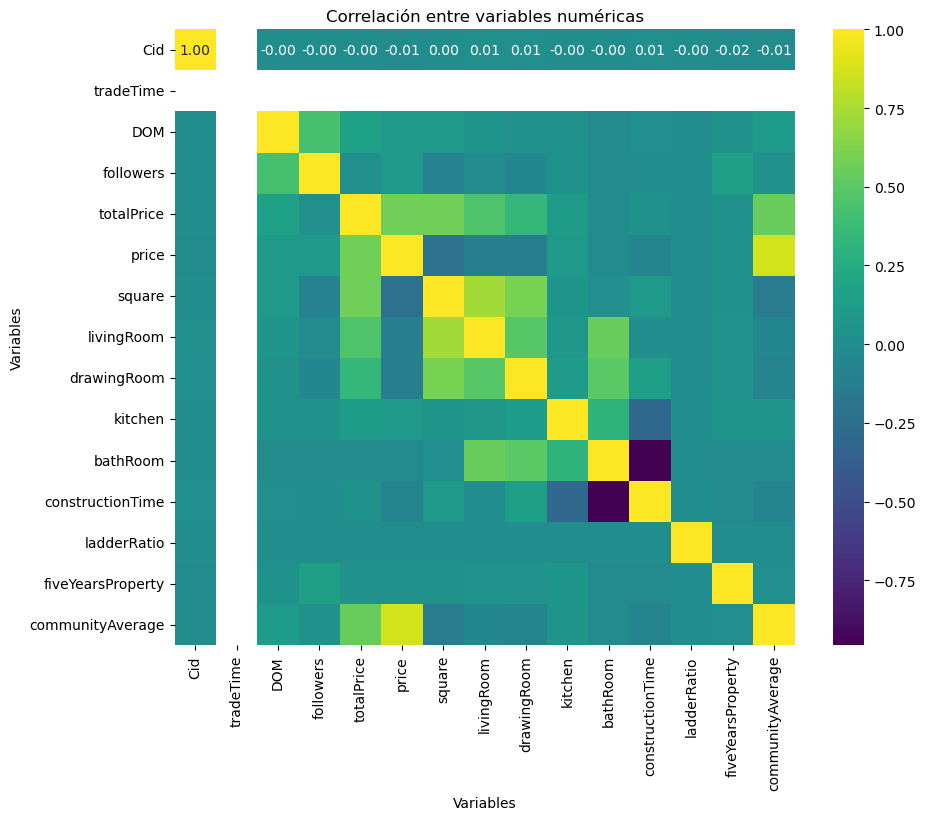

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


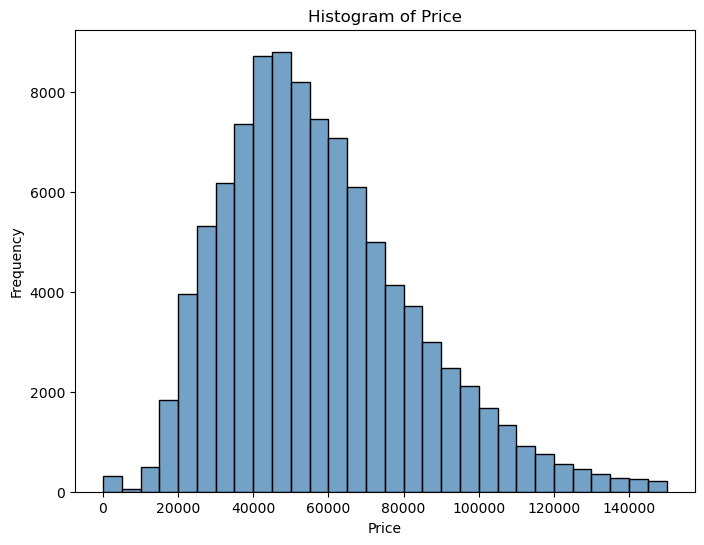

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data3, x='price', color='steelblue', bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [39]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
quantiles_teoricos = np.random.normal(loc=0, scale=1, size=len(data3['price']))
price_sorted = np.sort(data3['price'])
quantiles = stats.norm.ppf(np.linspace(0, 1, len(price_sorted)))

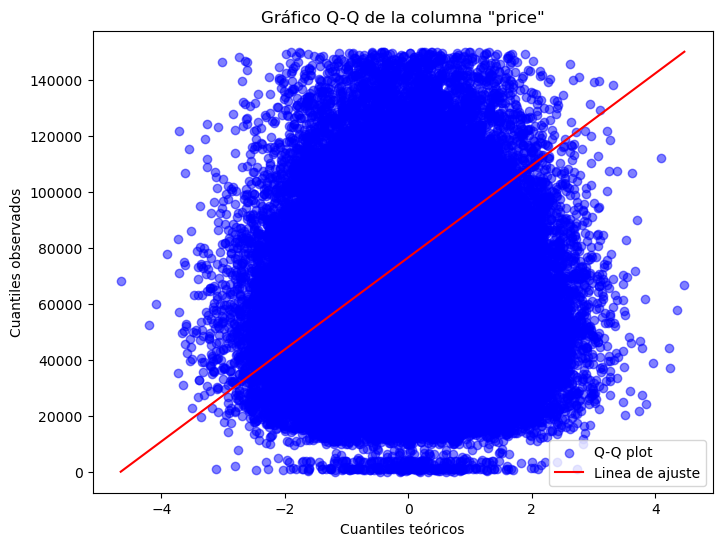

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(quantiles_teoricos, price_sorted, color='blue', alpha=0.5, label='Q-Q plot')
plt.plot([np.min(quantiles_teoricos), np.max(quantiles_teoricos)], [np.min(price_sorted), np.max(price_sorted)], color='red', label='Linea de ajuste')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.title('Gráfico Q-Q de la columna "price"')
plt.legend()
plt.show()

# Categorical Variables

In [41]:
categorical_columns = data3.select_dtypes(include=['object'])
plt.figure(figsize=(10, 6))
for col in categorical_columns:
    sns.countplot(x=col, data=data3, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1000x600 with 0 Axes>

C:\Users\monte\AppData\Local\Temp\ipykernel_18384\866979124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['buildingType'] = data3['buildingType'].astype('category')
C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


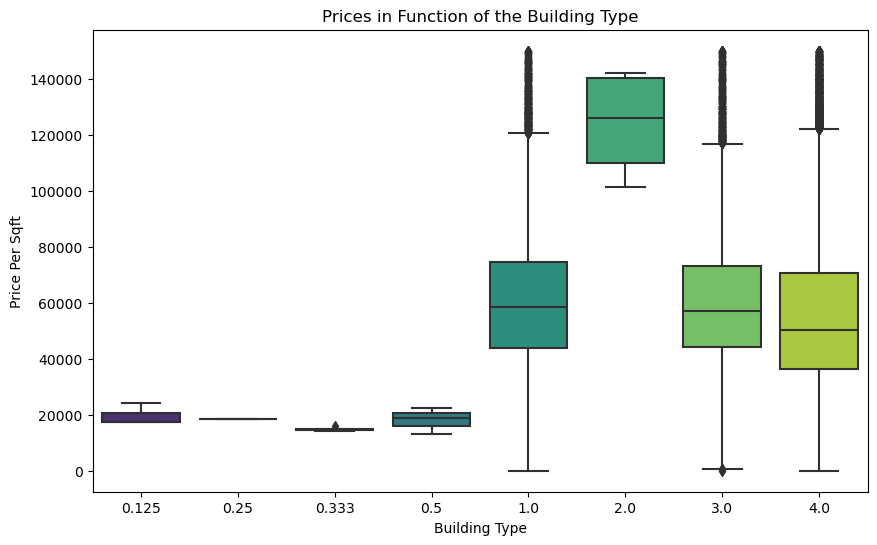

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
data3['buildingType'] = data3['buildingType'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data3, x='buildingType', y='price', palette='viridis')
plt.title('Prices in Function of the Building Type')
plt.ylabel('Price Per Sqft')
plt.xlabel('Building Type')
plt.show()

C:\Users\monte\AppData\Local\Temp\ipykernel_18384\3438066517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['buildingStructure'] = data3['buildingStructure'].astype('category')
C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


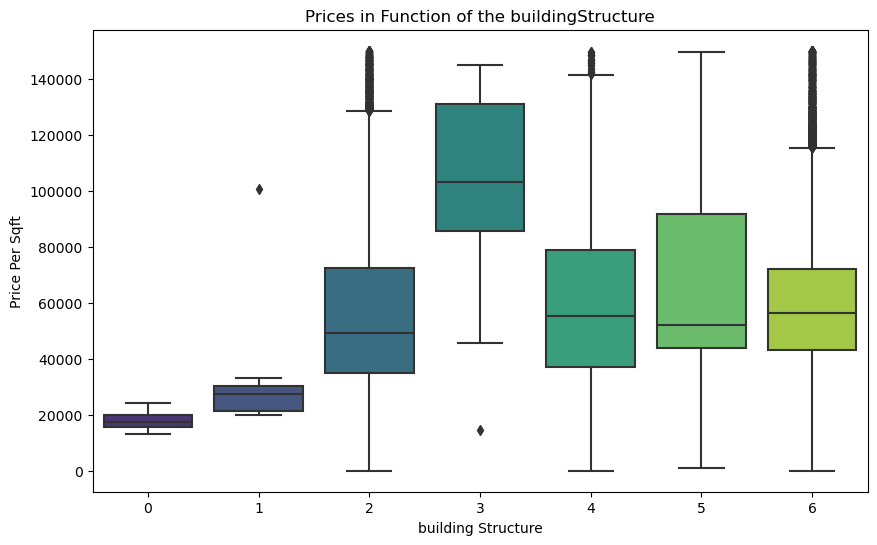

In [43]:
data3['buildingStructure'] = data3['buildingStructure'].astype('category')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data3, x='buildingStructure', y='price', palette='viridis')
plt.title('Prices in Function of the buildingStructure')
plt.ylabel('Price Per Sqft')
plt.xlabel('building Structure')
plt.show()

C:\Users\monte\AppData\Local\Temp\ipykernel_18384\1254064877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['renovationCondition'] = data3['renovationCondition'].astype('category')
C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


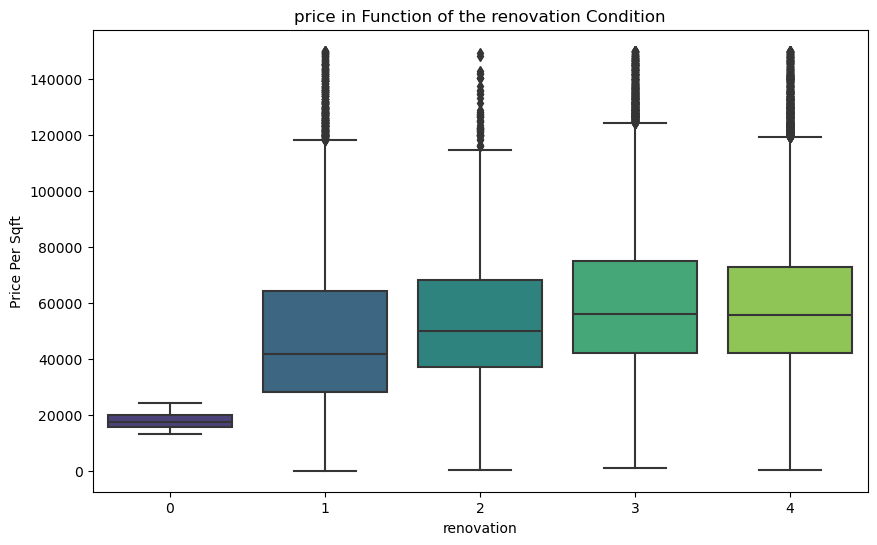

In [44]:
data3['renovationCondition'] = data3['renovationCondition'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data3, x='renovationCondition', y='price', palette='viridis')
plt.title('price in Function of the renovation Condition')
plt.ylabel('Price Per Sqft')
plt.xlabel('renovation')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


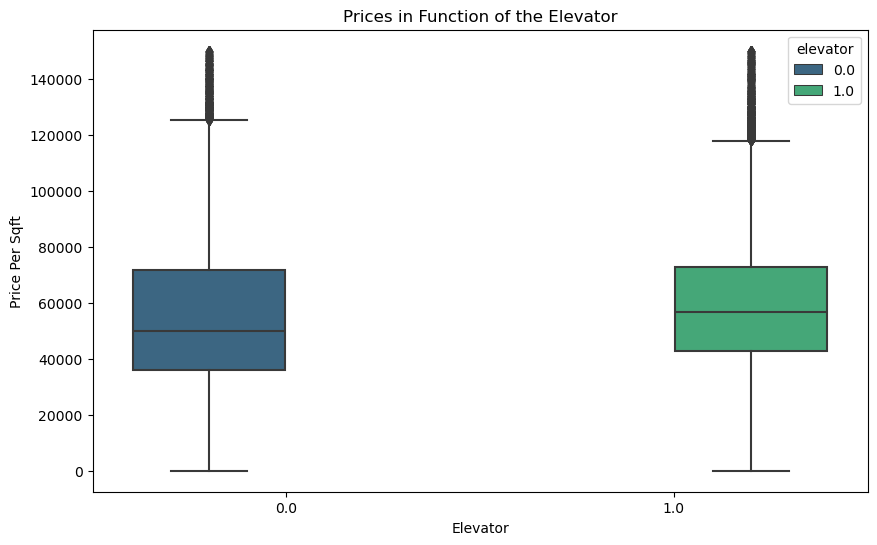

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data3, x='elevator', y='price', hue='elevator', palette='viridis')
plt.title('Prices in Function of the Elevator')
plt.ylabel('Price Per Sqft')
plt.xlabel('Elevator')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


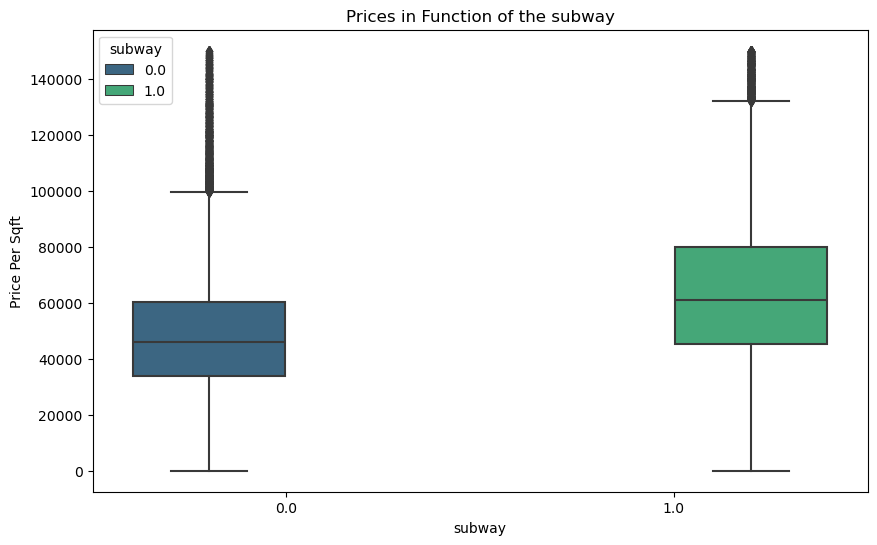

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data3, x='subway', y='price', hue='subway', palette='viridis')
plt.title('Prices in Function of the subway')
plt.ylabel('Price Per Sqft')
plt.xlabel('subway')
plt.show()

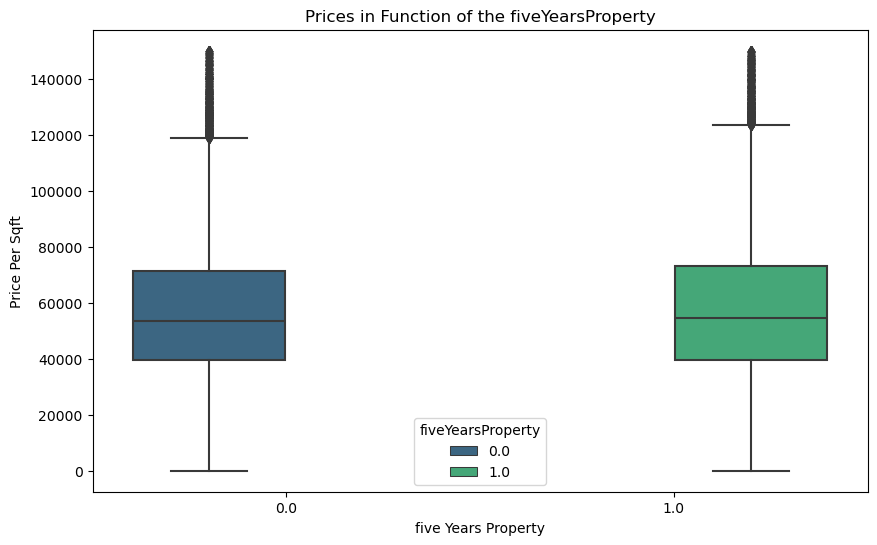

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data3, x='fiveYearsProperty', y='price', hue='fiveYearsProperty', palette='viridis')
plt.title('Prices in Function of the fiveYearsProperty')
plt.ylabel('Price Per Sqft')
plt.xlabel('five Years Property')
plt.show()

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


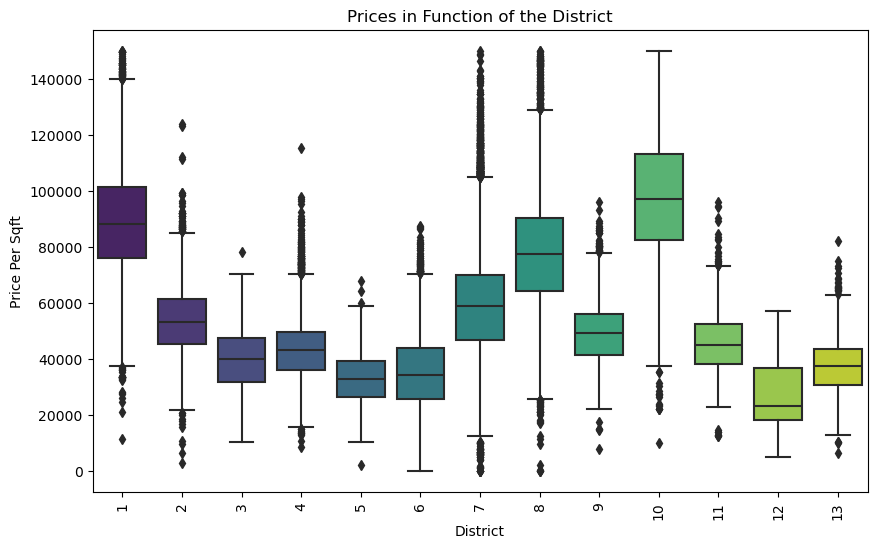

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data3, x='district', y='price', palette='viridis')
plt.title('Prices in Function of the District')
plt.ylabel('Price Per Sqft')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.show()

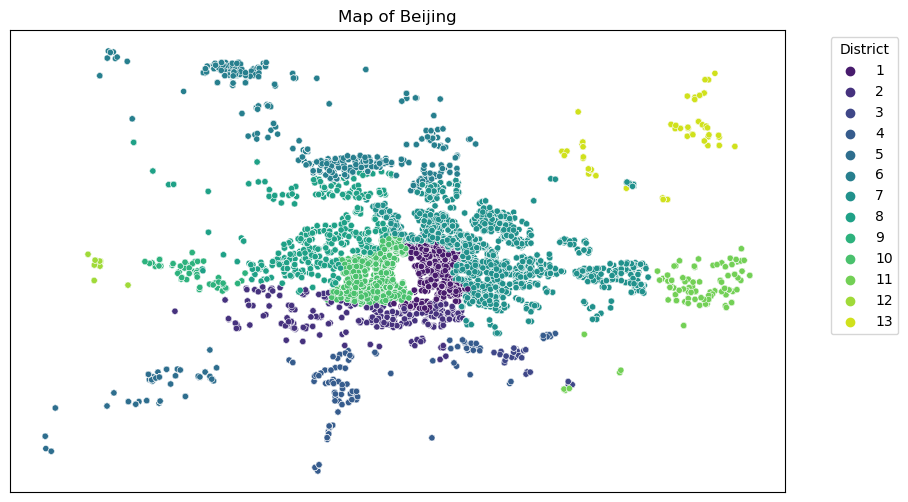

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data3, x='Lng', y='Lat', hue='district', palette='viridis', s=20, alpha=1)
plt.title('Map of Beijing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

# Creation of new data

In [50]:
data4 = data3.dropna(subset=columnas_con_nan)
missing_values_count = data4.isna().sum()
print(missing_values_count)

Lng                        0
Lat                        0
Cid                        0
tradeTime              99186
DOM                        0
followers                  0
totalPrice                 0
price                      0
square                     0
livingRoom                22
drawingRoom               22
kitchen                    0
bathRoom                   0
buildingType               0
constructionTime           0
renovationCondition        0
buildingStructure          0
ladderRatio                0
elevator                   0
fiveYearsProperty          0
subway                     0
district                   0
communityAverage           0
dtype: int64


In [51]:
print(data4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99186 entries, 0 to 136696
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Lng                  99186 non-null  float64 
 1   Lat                  99186 non-null  float64 
 2   Cid                  99186 non-null  float64 
 3   tradeTime            0 non-null      float64 
 4   DOM                  99186 non-null  float64 
 5   followers            99186 non-null  int64   
 6   totalPrice           99186 non-null  float64 
 7   price                99186 non-null  int64   
 8   square               99186 non-null  float64 
 9   livingRoom           99164 non-null  float64 
 10  drawingRoom          99164 non-null  float64 
 11  kitchen              99186 non-null  int64   
 12  bathRoom             99186 non-null  int64   
 13  buildingType         99186 non-null  category
 14  constructionTime     99186 non-null  float64 
 15  renovationCondition  99

In [52]:
import pandas as pd
data4['buildingType'] = pd.to_numeric(data4['buildingType'], errors='coerce')
data4['renovationCondition'] = pd.to_numeric(data4['renovationCondition'], errors='coerce')
data4['buildingStructure'] = pd.to_numeric(data4['buildingStructure'], errors='coerce')
data4['elevator'] = pd.to_numeric(data4['elevator'], errors='coerce')
data4['subway'] = pd.to_numeric(data4['subway'], errors='coerce')
data4['district'] = pd.to_numeric(data4['district'], errors='coerce')
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99186 entries, 0 to 136696
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  99186 non-null  float64
 1   Lat                  99186 non-null  float64
 2   Cid                  99186 non-null  float64
 3   tradeTime            0 non-null      float64
 4   DOM                  99186 non-null  float64
 5   followers            99186 non-null  int64  
 6   totalPrice           99186 non-null  float64
 7   price                99186 non-null  int64  
 8   square               99186 non-null  float64
 9   livingRoom           99164 non-null  float64
 10  drawingRoom          99164 non-null  float64
 11  kitchen              99186 non-null  int64  
 12  bathRoom             99186 non-null  int64  
 13  buildingType         99186 non-null  float64
 14  constructionTime     99186 non-null  float64
 15  renovationCondition  99186 non-null  int

In [53]:
import pandas as pd
nan_count = data.isna().sum()
print(nan_count)

url                        0
id                         0
Lng                        0
Lat                        0
Cid                        0
tradeTime                  0
DOM                    33772
followers                  0
totalPrice                 0
price                      0
square                     0
livingRoom                 0
drawingRoom                0
kitchen                    0
bathRoom                   0
floor                      0
buildingType            1225
constructionTime        5433
renovationCondition        0
buildingStructure          0
ladderRatio                0
elevator                   0
fiveYearsProperty          0
subway                     0
district                   0
communityAverage         119
dtype: int64


In [54]:
print("Before deleting rows with NaN:", data4.shape)
data_without_nan = data4.dropna()
print("After removing the rows with NaN:", data_without_nan.shape)

Before deleting rows with NaN: (99186, 23)
After removing the rows with NaN: (0, 23)


In [55]:
columns_to_drop = ['DOM', 'buildingType','constructionTime','communityAverage']
data4.drop(columns_to_drop, axis=1, inplace=True)

# Application of PCA method

In [56]:
import numpy as np
from sklearn.decomposition import PCA

In [57]:
data4_no_Target = data4.drop('price', axis=1)
pca = PCA().fit(data4_no_Target)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

* variation in accuracy across three training splits (20%, 25%, and 30%) using cross-validation
technique

In [ ]:
from sklearn.model_selection import train_test_split
X = data4.drop('price', axis=1)
y = data4['price']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [ ]:
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
train_sizes = [0.2, 0.25, 0.3]
train_size_names = [f"Train Size {int(size * 100)}%" for size in train_sizes]
accuracies = []

In [ ]:
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1 - train_size, random_state=42)
    print(train_size_names)

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
accuracy = cross_val_score(classifier, X_train, y_train, cv=5).mean()
accuracies.append(accuracy)

In [ ]:
print(f"Train Size {int(train_size * 100)}%: Accuracy = {accuracy}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2_square = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2_square

In [ ]:
def append_results(model_name, model, results_df, X_test, y_test):
    pred = model.predict(X_test)
    mae, mse, rmse, r2_square = evaluate(y_test, pred)
    cv_score = cross_val_score(model, X, y, cv=10).mean()
    results_append_df = pd.DataFrame(data=[[model_name, mae, mse, rmse, r2_square, cv_score]], columns=results_df.columns)
    results_df = results_df.append(results_append_df, ignore_index=True)
    return results_df

In [ ]:
from sklearn.model_selection import train_test_split
X = data4.drop('price', axis=1)
y = data4['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
data4.dropna(inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [ ]:
import numpy as np

if np.isnan(X_train).any() or np.isnan(y_train).any():
    X_train = X_train[~np.isnan(X_train).any(axis=1)]
    y_train = y_train[~np.isnan(y_train)]

# Mikolaj Presz  ,  I'm trying to do this, you can see if it works for you.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Function to calculate evaluation metrics
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2_square = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2_square

# Function to append results to the results DataFrame
def append_results(model_name, model, results_df, X_test, y_test):
    pred = model.predict(X_test)
    mae, mse, rmse, r2_square = evaluate(y_test, pred)
    cv_score = cross_val_score(model, X, y, cv=10).mean()
    results_append_df = pd.DataFrame(data=[[model_name, mae, mse, rmse, r2_square, cv_score]], columns=results_df.columns)
    results_df = results_df.append(results_append_df, ignore_index=True)
    return results_df

# Load and preprocess the data
data = pd.read_csv('your_file.csv')
X = data.drop('price', axis=1)
y = data['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a DataFrame to store the results
results_columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2', 'CV Score']
results_df = pd.DataFrame(columns=results_columns)

# Add model results
results_df = append_results('Linear Regression', model, results_df, X_test, y_test)

# Display the results
print(results_df)

In [ ]:
# Linear Regression: would be the method you want to apply, this is part of point 2 of the task.